In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline



In [43]:
N = 4

In [44]:
x = np.abs(np.array(list(range(N)), dtype = np.float32) - N/2)

In [45]:
x

array([2., 1., 0., 1.], dtype=float32)

In [13]:
np.fft.fft(x)

array([4.+0.j, 2.+0.j, 0.+0.j, 2.+0.j])

In [30]:
def DFTmat(N):
    F = np.zeros(shape = [N,N], dtype = np.complex)
    for i in range(N):
        for j in range(N):
            F[i,j] = np.exp(-1j * 2 * np.pi / N * i * j) / np.sqrt(N)
    return F

In [23]:
DFTmat(N) @ x

array([2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [25]:
np.conj(DFTmat(N)).T @ DFTmat(N) @ x 

array([1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])

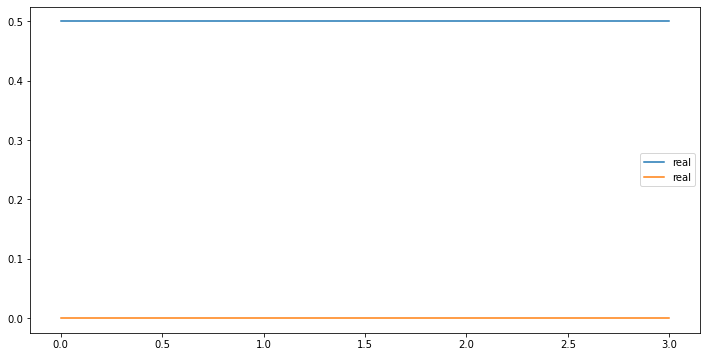

In [32]:
plt.figure(figsize=(12,6))
plt.plot( np.real(DFTmat(N)[0,:]),label='real')
plt.plot( np.imag(DFTmat(N)[0,:]),label='real')
plt.legend()

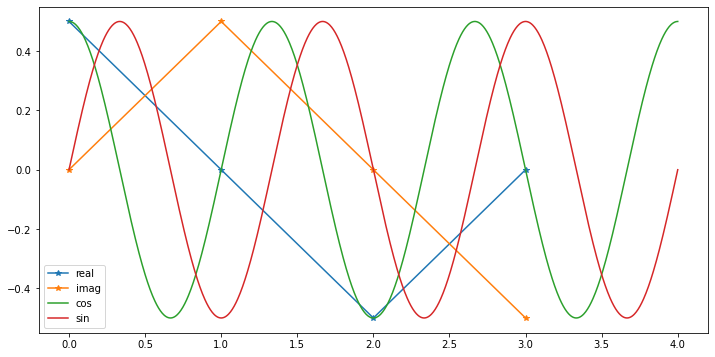

In [57]:
plt.figure(figsize=(12,6))

t=np.linspace(0,N,1000)
idx = 3
plt.plot(np.real(DFTmat(N)[idx,:]), '*-', label='real')
plt.plot(np.imag(DFTmat(N)[idx,:]), '*-', label='imag')

plt.plot(t, np.cos(2*np.pi/N*idx*t)/np.sqrt(N), label='cos')
plt.plot(t, np.sin(2*np.pi/N*idx*t)/np.sqrt(N), label='sin')

plt.legend()



In [67]:
F = DFTmat(N)
Fp = np.conj(DFTmat(N))
y = F @ x 

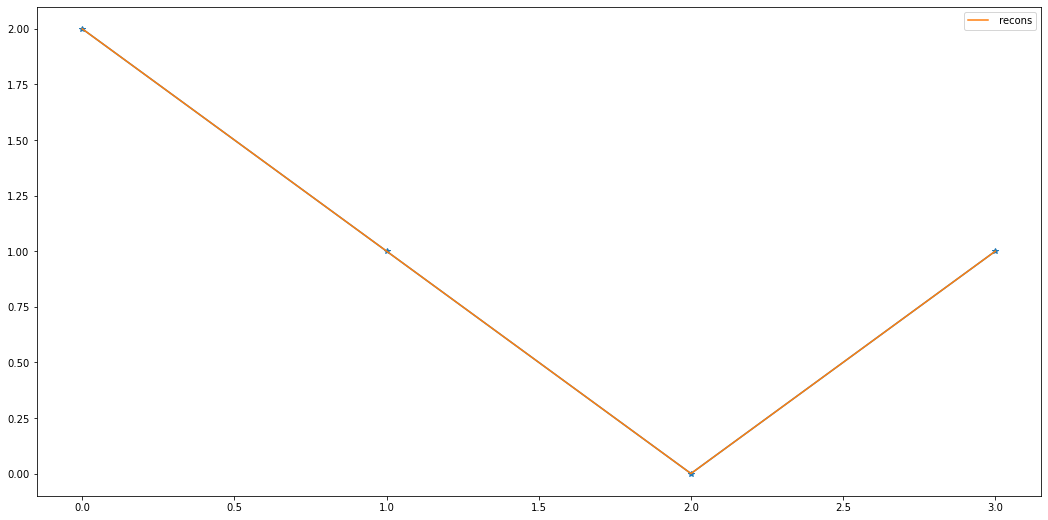

In [69]:
plt.figure(figsize=(18,9))
plt.plot(x, '*-')
S = np.zeros_like(Fp[:,0])

for i in range(N):
    s = y[i] * Fp[:,i]
    S = s + S
    
    
plt.plot(np.real(S), '-', label = ' recons')
plt.legend()



In [70]:
from scipy.linalg import circulant

In [71]:
L = circulant([2,-1,0,0,0,0,-1])

In [72]:
N = L.shape[0]

In [80]:
d, u =np.linalg.eigh(L)
idx = d.argsort()
d=d[idx]
u = u[:,idx]




In [81]:
np.allclose(L, u @ np.diag(d) @ u.T)

True

In [82]:
np.allclose(np.eye(N), u @ u.T)

True

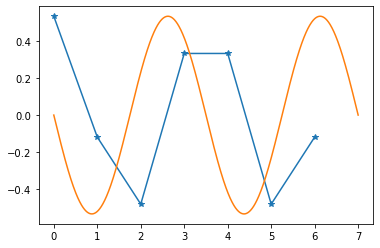

In [97]:
idx = 4
t = np.linspace( 0, N , 1000)
f = u[:, idx]

plt.plot(np.real(f), '*-', label='real')
#plt.plot(np.imag(f), '*-', label='imag')

k=2
plt.plot(t, -np.sin(t/N * 2*np.pi*k)/ np.sqrt(N/2))